# 多クラス分類での汎化誤差バウンド


[MATH_Generalization_margin_loss_and_SVM.ipynb](MATH_Generalization_margin_loss_and_SVM.ipynb)
では二値分類について考えました．ここでは多クラス分類を考えます．

---

**問題設定**

* 入力$x\in \mathcal{X}\subset \mathbb{R}^d$，出力$y \in \mathcal{Y}=\{1,2, \ldots, K\}$
* 関数：$f: \mathcal{X} \times \mathcal{Y} \rightarrow \mathbb{R}$, e.g., $f_w(x, y)=\left\langle w_y, x\right\rangle$
* 仮説関数$h_f: \mathcal{X}\to \mathcal{Y}$を
$h_f(x):=\underset{y \in \mathcal{Y}}{\operatorname{argmax}} f(x, y)$
* 0-1損失関数：$\mathbb{I}\left(y \neq h_f(x)\right)$

---

以降では損失関数についてのラデマッハ複雑度を導出します．
ランプ損失を考えてTalagrandの補題（リプシッツ定数１）で導出してもいいですが，より一般的な損失である$\phi_\rho$-マージン損失を導入しましょう．これはランプ損失の一般化です($\rho=1$のとき)．

**$\phi_\rho$-マージン損失**


$$
\phi_\rho= \begin{cases}0, & \rho \leq m \\ 1-m / \rho, & 0 \leq m \leq \rho \\ 1, & m \leq 0\end{cases}
$$


これは
$$
\phi_{0-1}(m)=\mathbb{I}(m \leq 0) \leq \phi_\rho(m) \leq \mathbb{I}(m \leq \rho)
$$
を満たすので，$0-1$損失の上界になってます．

---

この$\phi_\rho$マージン損失は，Talagrandの補題を使えばそのラデマッハ複雑度が一発で計算できます．

$$
\phi_\rho \circ \mathcal{F}=\left\{(x, y) \mapsto \phi_\rho(y f(x)) \mid f \in \mathcal{F}\right\}
$$

としましょう．このとき$\phi_\rho$のリプシッツ定数が$1/\rho$なので，ラデマッハ複雑度は
$$
R_n\left(\phi_\rho \circ \mathcal{F}\right) \leq \frac{1}{\rho} R_n(\mathcal{F})
$$
で与えられます．



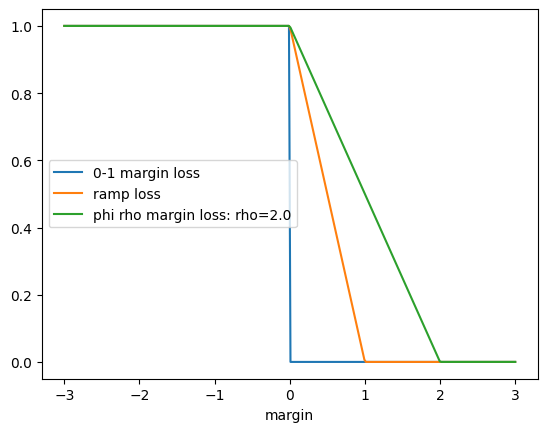

In [23]:
import numpy as np
import matplotlib.pyplot as plt

m = np.linspace(-3, 3, 300)
phi01 = np.where(m <= 0, 1, 0)
ramp = np.where((0 <= m) * (m <= 1), 1-m, 1)
ramp = np.where(m >= 1, 0, ramp)

rho = 2.0
phirho = np.where((0 <= m) * (m <= rho), 1-m/rho, 1)
phirho = np.where(m >= rho, 0, phirho)

plt.plot(m, phi01, label="0-1 margin loss")
plt.plot(m, ramp, label="ramp loss")
plt.plot(m, phirho, label="phi rho margin loss: rho=2.0")
plt.xlabel("margin")
plt.legend()

## 多クラス分類でのマージン関数

次のマージン関数を考えます：

$$
m(f ; x, y)=f(x, y)-\max _{y^{\prime} \neq y} f\left(x, y^{\prime}\right)
$$

これは0-1損失に対して
$$
\mathbb{I}\left(y \neq h_f(x)\right) \leq \mathbb{I}\left(f(x, y)-\max _{y^{\prime} \neq y} f\left(x, y^{\prime}\right) \leq 0\right)
$$
として上界を与えます（両側で期待値を取るとわかりやすいかも）．
また，$\phi_\rho$-マージン損失については

$$
\mathbb{I}(m(f ; x, y) \leq 0) \leq \phi_\rho(m(f ; x, y)) \leq \mathbb{I}(m(f ; x, y) \leq \rho)
$$

の上界を与えます．

### 準備１

さて，損失関数の集合に対するラデマッハ複雑度を使って汎化バウンドを出すために，次のマージンの集合を定義しましょう：

$$
\mathcal{M}=\{(x, y) \mapsto m(f ; x, y) \mid f \in \mathcal{F}\}
$$

また，次の関数の集合を定義します：

$$
\mathcal{F}^{\prime}=\left\{x \mapsto f\left(x, y^{\prime}\right) \mid f \in \mathcal{F}, y^{\prime} \in \mathcal{Y}\right\}
$$

これは[MATH_Generalization_margin_loss_and_SVM.ipynb](MATH_Generalization_margin_loss_and_SVM.ipynb)でやったような議論をしたいために定義してます．
例えば線形モデルならば各クラス$y \in \mathcal{Y} = \{1, 2, \dots, K\}$に対応した$f(x, y)=\left\langle w_y, x\right\rangle$を考えて
$$
\mathcal{F}^{\prime}=\left\{x \mapsto\left\langle w_{y^{\prime}}, x\right\rangle \mid w_{y^{\prime}} \in \mathbb{R}^d, y^{\prime} \in \mathcal{Y}\right\}
$$
としたりするわけですね．
すなわち，**各クラスを固定した場合の議論**をすることで他クラス分類に対応しようとしています．

### 準備２

続いて，多クラスになったときのラデマッハ複雑度を導出してみましょう．
ここでも各クラスを固定したときの話を考えます．

---

$$
\begin{aligned}
& \mathcal{G}=\{(x, y) \mapsto g(x, y) \in \mathbb{R}\} \\
& \mathcal{G}_y=\{x \mapsto g(x, y) \mid g \in \mathcal{G}\}
\end{aligned}
$$
とすると，
$$
R_n(\mathcal{G}) \leq \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{G}_y\right)
$$
が成り立ちます．

**証明**

面倒なのでデータについての期待値を省略してます：

$$
\begin{aligned}
& \frac{1}{n} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y_i\right)\right] \\
& =\frac{1}{n} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i \sum_{y \in \mathcal{Y}} g\left(x_i, y\right) \mathbb{I}\left(y=y_i\right)\right] \\
& \leq \frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y\right) \mathbb{I}\left(y=y_i\right)\right. \\
& =\frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y\right)\left(\frac{1}{2}+\mathbb{I}\left(y=y_i\right)-\frac{1}{2}\right)\right]
\end{aligned}
$$

よって，

$$
\begin{aligned}
R_n(\mathcal{G}) \leq & \frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y\right)\left(\frac{1}{2}+\mathbb{I}\left(y=y_i\right)-\frac{1}{2}\right)\right] \\
\leq & \frac{1}{2 n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y\right)\right] \quad \sup ((+\mathrm{B}) \leq \sup (\mathrm{A})+\sup (\mathrm{B}) \\
& +\frac{1}{2 n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \underbrace{\sigma_i\left(2 \mathbb{I}\left(y=y_i\right)-1\right)}_{\sigma_i \text { と分布が同じ }} g\left(x_i, y\right)] \\
= & \frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{g \in \mathcal{G}} \sum_{i=1}^n \sigma_i g\left(x_i, y\right)\right] \\
= & \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{G}_y\right) .
\end{aligned}
$$

---

また，次のpointwise-maximumを取ったときのラデマッハ複雑度も準備しておきます：

---

$$
\mathcal{G}=\left\{\max \left\{g_1, g_2\right\} \mid g_1 \in \mathcal{G}_1, g_2 \in \mathcal{G}_2\right\}
$$

とすると，

$$
R_n(\mathcal{G}) \leq R_n\left(\mathcal{G}_1\right)+R_n\left(\mathcal{G}_2\right)
$$

が成立する．

**証明**

一般に$\max \left\{g_1, g_2\right\}=\frac{g_1+g_2}{2}+\frac{\left|g_1-g_2\right|}{2}$であることを使います．絶対値関数は$1$-リプシッツ連続なので，

$$
\begin{aligned}
& \frac{1}{2 n} \mathbb{E}_\sigma\left[\sup _{g_1 \in \mathcal{G}_1, g_2 \in \mathcal{G}_2} \sum_{i=1}^n \sigma_i\left|g_1\left(x_i, y_i\right)-g_2\left(x_i, y_i\right)\right|\right] \\
& =\frac{1}{2 n} \mathbb{E}_\sigma\left[\sup _{g_1 \in \mathcal{G}_1, g_2 \in \mathcal{G}_2} \sum_{i=1}^n \underbrace{\sigma_i\left(g_1\left(x_i, y_i\right)-g_2\left(x_i, y_i\right)\right)}_{\text { 符号に関わらずランダム化された部分 }}\right] \\
& =\frac{1}{2 n} \mathbb{E}_\sigma\left[\sup _{g_1 \in \mathcal{G}_1, g_2 \in \mathcal{G}_2} \sum_{i=1}^n\left(\sigma_i g_1\left(x_i, y_i\right) \underbrace{-\sigma_i}_{\text{分布同じ}} g_2\left(x_i, y_i\right)\right)\right] \\
& =\frac{1}{2}\left(R_n\left(\mathcal{G}_1\right)+R_n\left(\mathcal{G}_2\right)\right) .
\end{aligned}
$$

---



### 多値マージンのラデマッハ複雑度

さて，準備ができたので多値マージンのラデマッハ複雑度を導出しましょう．

つまり，
* $\mathcal{M}=\{(x, y) \mapsto m(f ; x, y) \mid f \in \mathcal{F}\}$
* $\mathcal{F}^{\prime}=\left\{x \mapsto f\left(x, y^{\prime}\right) \mid f \in \mathcal{F}, y^{\prime} \in \mathcal{Y}\right\}$

に対して，$R_n\left(\phi_\rho \circ \mathcal{M}\right) \leq \frac{1}{\rho} R_n(\mathcal{M}) \leq \frac{|\mathcal{Y}|^2}{\rho} R_n\left(\mathcal{F}^{\prime}\right)$を証明します．

**注意: これは[Foundations of ML](https://www.hlevkin.com/hlevkin/45MachineDeepLearning/ML/Foundations_of_Machine_Learning.pdf)の９章あたりの証明を使えばもっと良いバウンドが出せます．**


**証明**

$\mathcal{M}_y=\{x \mapsto m(f ; x, y) \mid f \in \mathcal{F}\}$とすると，

$$
\begin{aligned}
& R_n(\mathcal{M}) \leq \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{M}_y\right)=\sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{m \in \mathcal{M}_y} \sum_{i=1}^n \sigma_i m\left(f ; x_i, y\right)\right] \\
& =\frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{f \in \mathcal{F}} \sum_{i=1}^n \sigma_i\left(f\left(x_i, y\right)-\max _{y^{\prime} \neq y} f\left(x_i, y^{\prime}\right)\right)\right] \\
& \leq \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{F}_y\right)+\frac{1}{n} \sum_{y \in \mathcal{Y}} \mathbb{E}_\sigma\left[\sup _{f \in \mathcal{F}} \sum_{i=1}^n \sigma_i\left(\max _{y^{\prime} \neq y} f\left(x_i, y^{\prime}\right)\right)\right] \\
& \leq \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{F}_y\right)+\sum_{y \in \mathcal{Y}} \sum_{y^{\prime} \neq y} R_n\left(\mathcal{F}_{y^{\prime}}\right)\\
& \leq \sum_{y \in \mathcal{Y}} R_n\left(\mathcal{F}^{\prime}\right)+\sum_{y \in \mathcal{Y}} \sum_{y^{\prime} \neq y} R_n\left(\mathcal{F}^{\prime}\right) \text { by } \mathcal{F}_y \subset \mathcal{F}^{\prime} \\
& \leq|\mathcal{Y}| R_n\left(\mathcal{F}^{\prime}\right)+|\mathcal{Y}|(|\mathcal{Y}|-1) R_n\left(\mathcal{F}^{\prime}\right) \\
& =|\mathcal{Y}|^2 R_n\left(\mathcal{F}^{\prime}\right) .
\end{aligned}
$$

です．